In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [2]:
df  = pd.read_csv('F:\Student_performance_model\Data\Student_Performance.csv')

<>:1: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:1: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
C:\Users\Hassan  COMPUTERS\AppData\Local\Temp\ipykernel_5932\2688007770.py:1: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
  df  = pd.read_csv('F:\Student_performance_model\Data\Student_Performance.csv')


In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(127)

In [8]:
df['Previous Scores'].value_counts()

Previous Scores
54    216
87    208
56    192
62    184
89    182
60    181
53    181
77    181
52    176
58    176
57    176
49    175
66    175
65    175
84    175
91    175
97    174
79    174
40    173
83    173
75    172
70    172
93    172
47    172
92    172
90    172
42    171
44    170
48    170
95    169
41    169
67    168
43    167
73    166
61    165
78    165
88    164
59    163
63    163
46    163
86    162
81    161
71    159
99    159
85    159
96    159
98    158
45    154
69    153
80    153
68    153
82    148
94    148
72    148
64    147
55    144
74    143
76    142
51    140
50    123
Name: count, dtype: int64

In [9]:
df[df.duplicated()]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [10]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [14]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [15]:
df[df.isnull()].sum()

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities            0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: object

In [16]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [17]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [18]:
df_new= df.drop('Extracurricular Activities', axis=1)

In [19]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [20]:
df_new

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


In [22]:
df.corr(numeric_only=True)['Performance Index'].sort_values(ascending=False)

Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Name: Performance Index, dtype: float64

<Axes: >

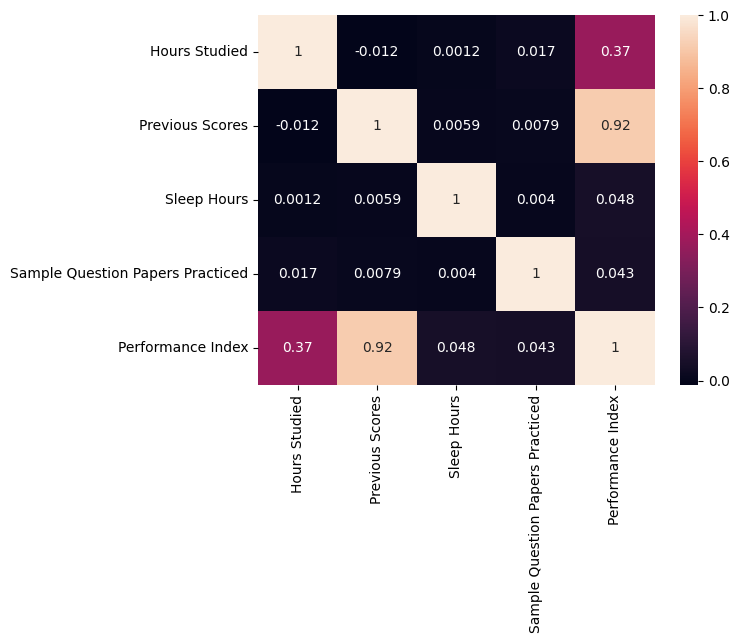

In [23]:
sns.heatmap(df_new.corr(), annot=True)

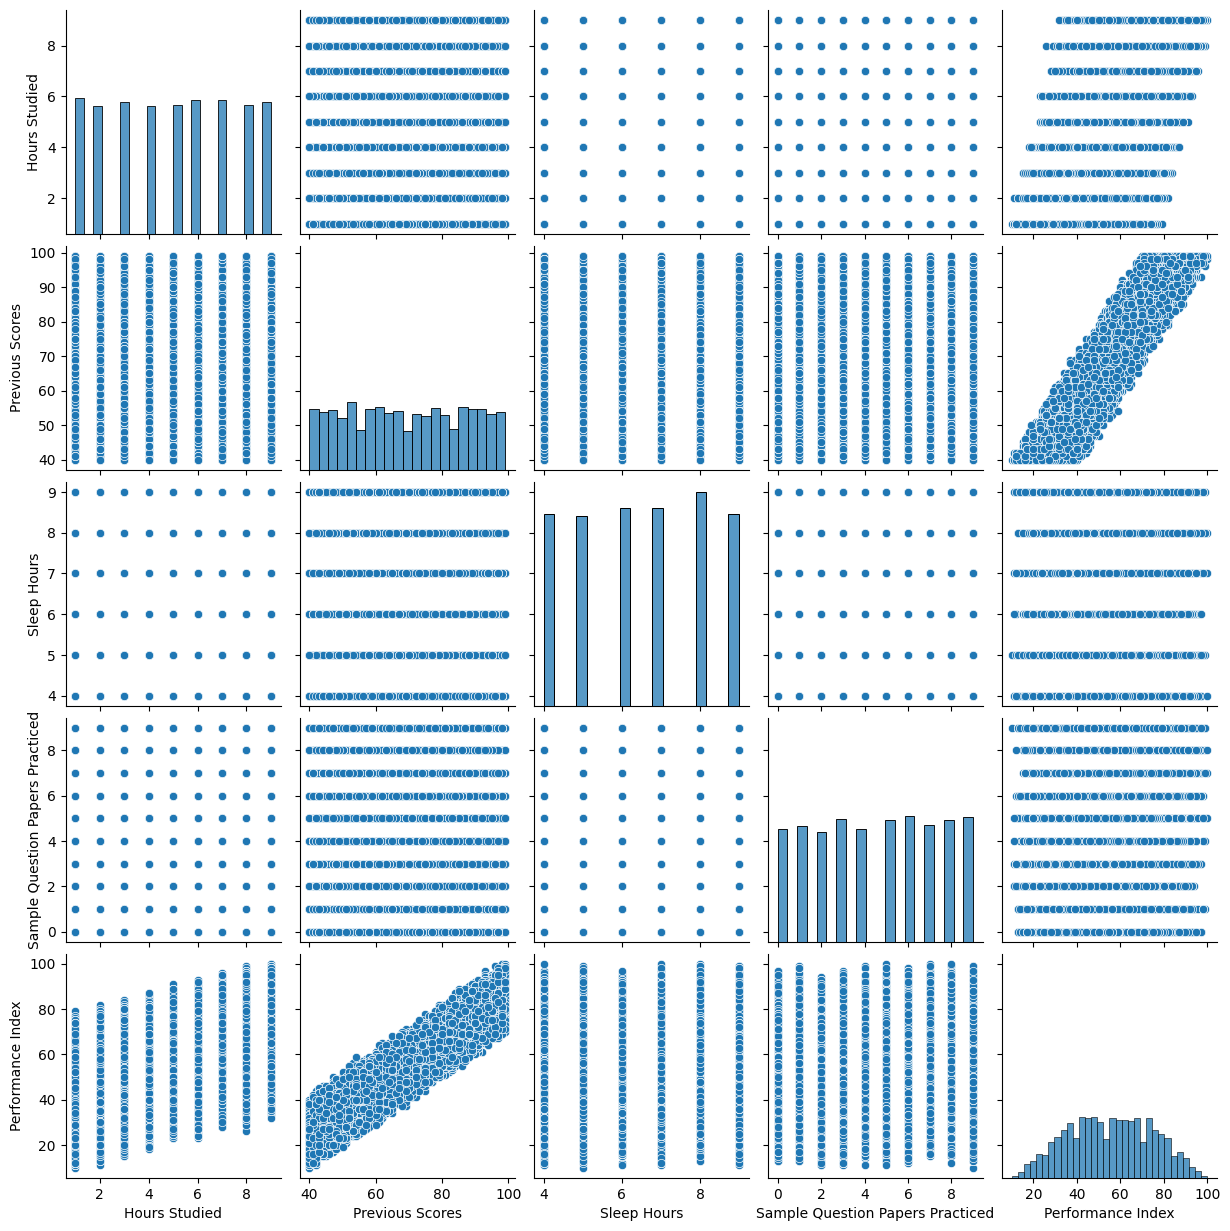

In [24]:
sns.pairplot(df_new)
plt.show()

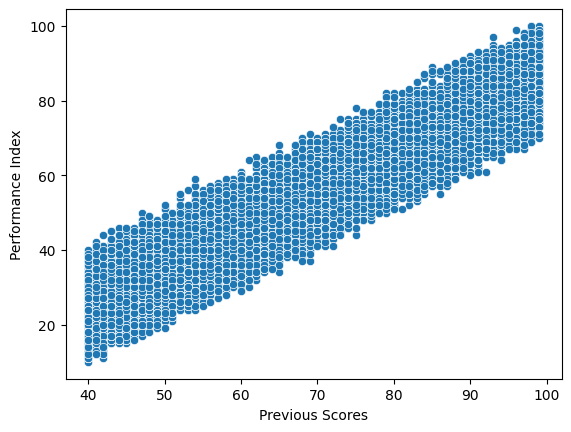

In [25]:
sns.scatterplot(x='Previous Scores', y='Performance Index', data=df_new)
plt.show()

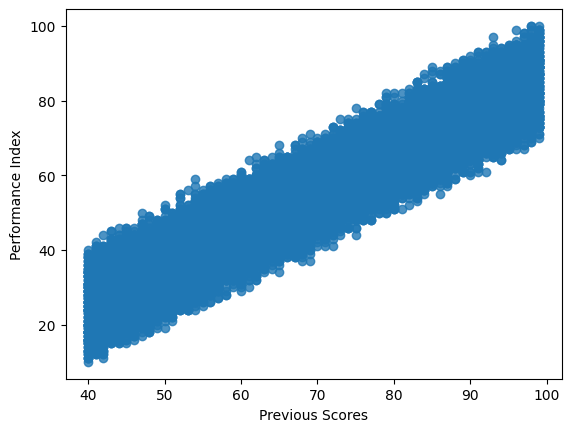

In [26]:
sns.regplot(x='Previous Scores', y='Performance Index', data=df_new)
plt.show()

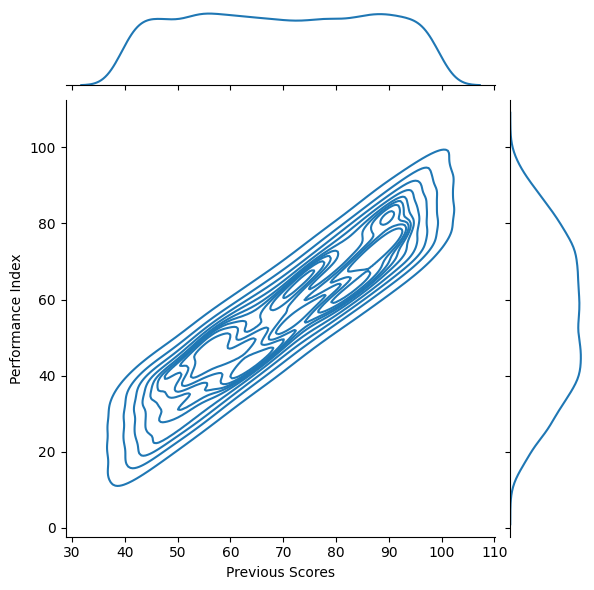

In [27]:
sns.jointplot(x='Previous Scores', y='Performance Index', data=df_new, kind='kde')
plt.show()

In [28]:
X = df_new.drop(['Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'], axis=1)

y_true = df_new['Performance Index']

In [29]:
X

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75
...,...,...
9995,1,49
9996,7,64
9997,6,83
9998,9,97


In [30]:
y_true

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [31]:
X_train, X_test, y_train, y_test =train_test_split(X, y_true, test_size=0.3, random_state=43 ) 

In [32]:
X_train

,Hours Studied,Previous Scores
2724,8,55
5057,9,76
6027,5,61
6729,8,76
9132,2,60
...,...,...
8499,9,52
2064,8,78
7985,6,79
2303,2,60


In [33]:
lr_model = LinearRegression()

In [34]:
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
lr_model.coef_

array([2.87506305, 1.0195174 ])

In [36]:
lr_model.intercept_

np.float64(-29.925612334443983)

In [37]:
y_pred = lr_model.predict(X_train)

In [38]:

print(mean_squared_error(y_train, y_pred))

5.253510861770021


In [39]:
X_test

,Hours Studied,Previous Scores
9415,8,57
6377,3,57
8019,7,91
7754,6,99
4961,2,68
...,...,...
9363,4,93
9448,4,58
9605,9,68
9486,8,61


In [40]:
z_pred = lr_model.predict(X_test)

In [41]:
y_pred

array([49.1483489 , 73.4332773 , 46.64026415, ..., 67.86664035,
       36.99555762, 25.2303988 ], shape=(7000,))

In [42]:
mean_absolute_error(y_test,z_pred )

1.8097354827029997

In [43]:
z_pred

array([51.1873837 , 36.81206847, 82.97591217, ..., 65.27713812,
       55.26545329, 34.87510533], shape=(3000,))

In [44]:
X_train.shape

(7000, 2)

In [45]:
'''
def adjust(y_test, y_pred, X_train):
    r2 = r2_score(y_test, y_pred)
    n, p = X_train.shape 
    adjusted_r2 = 1 - (1 - r2) * ((n - 1)/ (n - p -1))
    return ('Adjusted r2: ', adjusted_r2)
    adjust(y_test, y_pred, X_train)
'''


"\ndef adjust(y_test, y_pred, X_train):\n    r2 = r2_score(y_test, y_pred)\n    n, p = X_train.shape \n    adjusted_r2 = 1 - (1 - r2) * ((n - 1)/ (n - p -1))\n    return ('Adjusted r2: ', adjusted_r2)\n    adjust(y_test, y_pred, X_train)\n"

In [ ]:
study_hour = float(input('Enter your study hours: '))
previous_scores = float(input('Enter your previous scores: '))


performance_pred = lr_model.predict([[study_hour, previous_scores]])

print('Predicted weight: ', performance_pred)

In [ ]:
import pickle

In [ ]:
with open('Student_performance.pkl', mode='wb') as f:
    pickle.dump(lr_model, f)

In [ ]:
with open('Student_performance.pkl', mode='rb') as f:
    loaded_model = pickle.load(f)